<a href="https://colab.research.google.com/github/DobryVecher1/dl-phys-vsu/blob/main/lectures/04_pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([1,23,3])

torch.linspace(0, 1, 20)

tensor([0.0000, 0.0526, 0.1053, 0.1579, 0.2105, 0.2632, 0.3158, 0.3684, 0.4211,
        0.4737, 0.5263, 0.5789, 0.6316, 0.6842, 0.7368, 0.7895, 0.8421, 0.8947,
        0.9474, 1.0000])

In [3]:
torch.arange(0, 10, 1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
x.shape

torch.Size([3])

In [5]:
a = torch.randn((2, 4, 1))
print(a)

a.numpy()

tensor([[[-0.8822],
         [ 0.9108],
         [-0.7259],
         [ 1.8161]],

        [[ 0.9758],
         [ 0.7804],
         [-0.4062],
         [-0.6265]]])


array([[[-0.8822101 ],
        [ 0.9107852 ],
        [-0.7258923 ],
        [ 1.8160837 ]],

       [[ 0.9757635 ],
        [ 0.78037864],
        [-0.40617582],
        [-0.6264504 ]]], dtype=float32)

In [6]:
x = torch.tensor([4., 5., 2.], requires_grad=True)

print(x)

tensor([4., 5., 2.], requires_grad=True)


In [9]:
# x -> y -> z
x = torch.tensor([2.0, 4.2, 3.9], requires_grad=True)

y = x + 3
z = torch.mean(y**2)

print(z)

z.backward()

# dz/dx
print(x.grad)

tensor(41.4833, grad_fn=<MeanBackward0>)
tensor([3.3333, 4.8000, 4.6000])


In [10]:
x = torch.randn((2, 3, 200, 200))

print(x.shape)

conv = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding='same')
pool = torch.nn.MaxPool2d(kernel_size=2,)
flat = torch.nn.Flatten()

x = conv(x)
print(x.shape)
x = pool(x)
print(x.shape)
x = flat(x)
print(x.shape)


torch.Size([2, 3, 200, 200])
torch.Size([2, 64, 200, 200])
torch.Size([2, 64, 100, 100])
torch.Size([2, 640000])


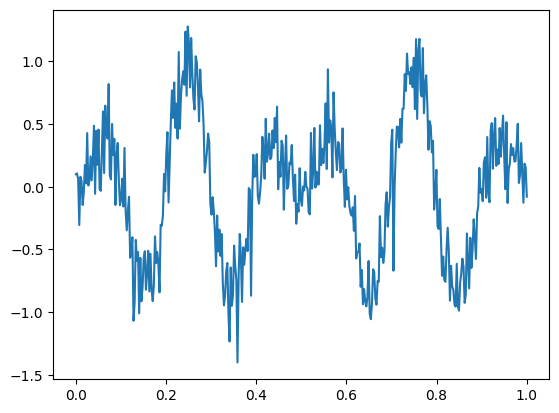

In [11]:
N = 400
x = torch.linspace(0, 1, N)

# S(t) = A(t) * sin(wt)

noise = torch.randn(N) * 0.2
y = torch.sin(2*torch.pi*1*x) * torch.sin(2*torch.pi*5*x) + noise

plt.plot(x, y)

In [12]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.nn_model = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
        )

        self.loss = nn.MSELoss()
        self.optimizer = torch.optim.AdamW(self.nn_model.parameters(), lr=1e-3)

    def forward(self, x):
        return self.nn_model(x)

    def fit(self, x_train, y_train, num_epoch=10):

        for ii in range(num_epoch):

            logits_pred = self.forward(x_train)
            loss = self.loss(logits_pred, y_train)

            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()


            if ii % 1000 == 0:
                print(f"Epoch: {ii}\nLoss: {loss}")


In [ ]:
model = NeuralNetwork()

model.fit(x[:, None], y[:, None], num_epoch=20000)

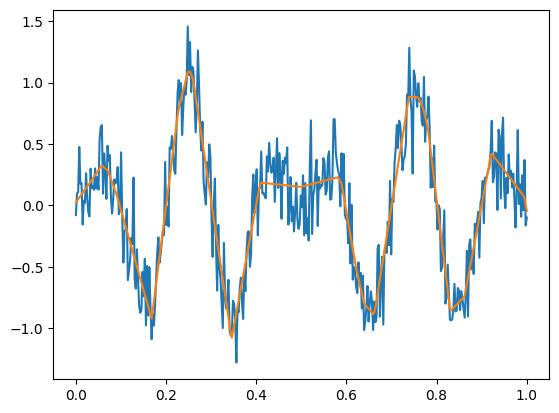

In [ ]:
plt.plot(x, y)
plt.plot(x, model(x[:, None]).detach().numpy())

In [ ]:
# print model parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)